### Mounting Drive from Colab

Google Drive space to store data and scripts:

- folder where results are written (e.g. projects/deep_learning_for_breeding/iteration1/


In [ ]:
#this cell mounts the user's google drive in the specified folder,
#but only once (doing more than once would generate an error)
import os

gdrive_folder = '/content/gdrive'
project_folder = '/content/gdrive/MyDrive/projects/deep_learning_for_breeding/temp' ## !! IMPORTANT: change this depending on data iteration !!

if not os.path.isdir(gdrive_folder):
  from google.colab import drive
  drive.mount(gdrive_folder)

Mounted at /content/gdrive


### Importing data

- select file name (e.g. phenotypes_iteration1) (default: 'phenotypes')
- select trait: e.g. 'simphe_mean0_hSquare0.7_cv0.1_QTN1000_A100_D0_AA0_AD0_DA0_DD0_epoch1649239502'

kinship matrices are hosted on [zenodo.org](https://zenodo.org/record/6602439#.YpofCHVBxhE);
simulated phenotypes are hosted on **Github** (https://github.com/filippob/paper_deep_learning_vs_gblup)

In [ ]:
#for data import scripts
import argparse

#general import used everywhere
import numpy as np
import pandas as pd

## file name (default 'phenotypes')
fname = 'phenotypes_iteration1'

## parameters
### iteration 1
trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A100_D0_AA0_AD0_DA0_DD0_epoch1649239502'
#trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A75_D25_AA0_AD0_DA0_DD0_epoch1649239502'
#trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A50_D50_AA0_AD0_DA0_DD0_epoch1649240345'
#trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A25_D75_AA0_AD0_DA0_DD0_epoch1649240345'
#trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A0_D100_AA0_AD0_DA0_DD0_epoch1649240989'
#trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A33_D33_AA34_AD0_DA0_DD0_epoch1649241541'
#trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A33_D33_AA0_AD34_DA0_DD0_epoch1649241541'
#trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A33_D33_AA0_AD0_DA34_DD0_epoch1649242513'
#trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A33_D33_AA0_AD0_DA0_DD34_epoch1649242513'
#trait='simphe_mean0_hSquare0.7_cv0.1_QTN1000_A33_D33_AA8.5_AD8.5_DA8.5_DD8.5_epoch1649246514'

#loading import functions 
!wget -O import_kinship.py https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/import_kinship.py
!wget -O import_phenotype.py https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/import_phenotype.py
!wget -O import_functions.py https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/import_functions.py

--2022-06-03 14:34:07--  https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/import_kinship.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2527 (2.5K) [text/plain]
Saving to: ‘import_kinship.py’

import_kinship.py   100%[===================>]   2.47K  --.-KB/s    in 0s      

2022-06-03 14:34:07 (31.4 MB/s) - ‘import_kinship.py’ saved [2527/2527]

--2022-06-03 14:34:07--  https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/import_phenotype.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaitin

In [ ]:
#should we download the data? (if it's already there, there's no need to
#waste time, this is useful for reruns of the script without resetting the env)
if 'kinship' not in globals():
  #importing cattle data in two variables: kiship and phenotypes
  %run import_kinship.py -r https://zenodo.org/record/6602439/files/ -s /content/data/ -d cattle

  #transposing kinship so that it's feeedable to keras
  kinship = np.transpose(kinship, (2,1,0))
else:
  print('Kinship data already saved locally, skipping download')

## import phenotypic data
%run import_phenotype.py -r https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/data/simulated_phenotypes/ -s /content/data/ -d cattle --fname "$fname" -p "$trait"

Remote folder is: https://zenodo.org/record/6602439/files/
Target folder is: /content/data/
Dataset is: cattle
Data will be downloaded to: /content/data/cattle/
create folder /content/data/cattle/
reading kinship_additive_minMAF0.05_maxMAF0.5.csv
reading kinship_additive_minMAF0.01_maxMAF0.5.csv
reading kinship_epistasis_DD_minMAF0.05_maxMAF0.5.csv
reading kinship_epistasis_AD_minMAF0.01_maxMAF0.05.csv
reading kinship_epistasis_AA_minMAF0.01_maxMAF0.05.csv
reading kinship_additive_minMAF0.01_maxMAF0.05.csv
reading kinship_epistasis_AA_minMAF0.05_maxMAF0.5.csv
reading kinship_epistasis_DD_minMAF0.01_maxMAF0.05.csv
reading kinship_epistasis_AD_minMAF0.05_maxMAF0.5.csv
reading kinship_epistasis_AD_minMAF0.01_maxMAF0.5.csv
reading kinship_epistasis_AA_minMAF0.01_maxMAF0.5.csv
reading kinship_dominance_minMAF0.01_maxMAF0.05.csv
reading kinship_epistasis_DD_minMAF0.01_maxMAF0.5.csv
reading kinship_dominance_minMAF0.01_maxMAF0.5.csv
reading kinship_dominance_minMAF0.05_maxMAF0.5.csv
The shape

### Data preprocessing - phenotypes

Phenotypic data are standardized: mean 0 and standard deviation 1 (as for GBLUP)

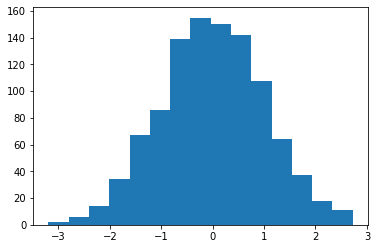

In [ ]:
#normalization
phenotypes_mean = np.mean(phenotypes)
phenotypes_sd = np.std(phenotypes)
phenotypes = (phenotypes - phenotypes_mean) / phenotypes_sd

#taking a look at the target variable
from matplotlib import pyplot as plt
plt.hist(phenotypes, bins = 15)
plt.show()

## Build the neural network

### Import support functions

Download support functions to:

- set up the deep learning model
- apply data augmentation if needed
- calculate performance metrics
- save results

In [ ]:
#keras custom metrics, relevant functions: pearson() and rmse()
!wget -O keras_metrics.py https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/keras_metrics.py
%run keras_metrics.py

#general toolbox
!wget -O keras_toolbox.py https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/keras_toolbox.py
%run keras_toolbox.py

#functions to parse and save results
!wget -O save_results.py https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/save_results.py
%run save_results.py

#functions to aid data augmentation
!wget -O data_augmentation_toolbox.py https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/data_augmentation_toolbox.py
%run data_augmentation_toolbox.py

--2022-06-03 14:51:13--  https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/keras_metrics.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3950 (3.9K) [text/plain]
Saving to: ‘keras_metrics.py’

keras_metrics.py    100%[===================>]   3.86K  --.-KB/s    in 0s      

2022-06-03 14:51:13 (54.4 MB/s) - ‘keras_metrics.py’ saved [3950/3950]

--2022-06-03 14:51:16--  https://raw.githubusercontent.com/filippob/paper_deep_learning_vs_gblup/main/scripts/keras_toolbox.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

<Figure size 432x288 with 0 Axes>

### Model parameters

Define parameters to run the deep learning model (run at least 20 epochs to be able to save results)

In [ ]:
#dictionary
config = dict({'input_shape':(kinship.shape[1], kinship.shape[2], 1),
               'batch_size':64,
               'num_epochs':30,
               'val_split':0,
               'learn_rate':0.001,
               'architecture':'Dense',
               'pool_step' : 2,
               'drop_rate' : 0.25,
               'regularizer_l1' : None,
               'regularizer_l2' : None
               })


### Resampling data and fitting the NN model

Training - Validation split: 80% - 20%

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.losses import MeanSquaredError, CosineSimilarity
import tensorflow.keras.backend as K
import json
from textwrap import wrap
import datetime;

#comment/uncomment/create an experiment configuration block, below

#------------------------
#------------------------
#experiment: best five layers, data augm on x
config['experiment'] = '5L[32, 64][64, 32, 16], gaussian augmentation on X'
config['experiment_desc'] = ''
config['conv_layers'] = [32, 64]
config['dense_layers'] = [64, 32, 16] 
reps_values    = [1]                    # n. of augmented copies of the data
sigma_X_values = [0.1]                  # magnitude of noise added to augmented data
sigma_y_values = [None]
suffix = 'selected_net' 
save_predictions = False                 # if we want to save predictions to a file

## number of replicates
for rep in range(1): ## change range(n) for the number of replicates n
  for i in range(len(reps_values)):
    print(" - updating the config object")
    config['gaussAugm_reps'] = reps_values[i]
    config['gaussAugm_sigma_x'] = sigma_X_values[i]
    config['gaussAugm_sigma_y'] = sigma_y_values[i]

    print(" - defining the model")
    model = instantiate_network(config)
    model.trainable = True
    trainable_count = np.sum([K.count_params(w) for w in model.trainable_weights])

    print(" - compiling the model")
    rmsprop = tf.keras.optimizers.RMSprop(learning_rate=config['learn_rate'])
    model.compile(loss = MeanSquaredError(), optimizer = rmsprop, metrics = [pearson, rmse])

    print(" - splitting train and validation sets")
    (train_x, train_y, val_x, val_y, sel_val) = train_val_split(x=kinship, y=phenotypes, validation_split=0.2)

    print(" - augmenting train data with gaussian noise")
    (train_x_augm, train_y_augm) = augment_add_normal_noise(x = train_x, y = train_y, 
                                                            reps=config['gaussAugm_reps'], 
                                                            mu = None,     #mu of noise on y
                                                            sigma = config['gaussAugm_sigma_y'],  #var of noise on y
                                                            mu_x    = 0,   #mu of noise on x
                                                            sigma_x = config['gaussAugm_sigma_x']) #var of noise on x

    #room for training history
    h = None

    print(" - fitting the model")
    for epochs in range(0, config['num_epochs'], 10):
      print('   - doing epochs ' + str(epochs) + ' -> ' + str(epochs + 10))

      #train for 10 epochs on training set, agumented
      h_train = model.fit(train_x_augm, train_y_augm,
          batch_size=config['batch_size'],
          epochs = 10,
          validation_split = 0,
          verbose=1)
      
      #measuring perfomances on the validation set
      validation_metrics = model.evaluate(val_x, val_y, batch_size=config['batch_size'])

      #keeping track
      h = merge_history(
          train_set_history = h_train,
          val_set_evaluation = validation_metrics, 
          metrics = model.metrics_names, 
          past_merged_history = h)
      
    #training is over, let's just update the internal epochs count
    h.params['epochs'] = epochs + 10
          ## saving predictions if required
    
    ## the model object is used to extract predictions
    ## if not reinstantiated, I believe that the model object keeps being over
    ## epochs in the above for loop; therefore the model object after the loop
    ## containes the fully trained model to be used for predictions
    if save_predictions == True:
      print(" - saving predictions")
      predictions = get_predictions(model, val_x, val_y, sel_val, config)
      fname = os.path.join(project_folder, trait, suffix, "predictions.csv")
      print("writing results to: ", fname)
      writeout_results(predictions, fname)
      ## calculating NDCG on predictions (val set)
      ndcg10  = ndcg(predictions['y'], predictions['y_hat'], 0.10)
      ndcg20  = ndcg(predictions['y'], predictions['y_hat'], 0.20)
      ndcg50  = ndcg(predictions['y'], predictions['y_hat'], 0.50)
      ndcg100 = ndcg(predictions['y'], predictions['y_hat'], 1.0)

    print(" - evaluating results")
    timestamp = datetime.datetime.now()
    #config['timestamp'] = str(timestamp) # commented out because get_predictions() already produces a timestamp column in config
    max_val_pearson = str(np.nanmax(h.history['val_pearson']))
    print("Best value for correlation on VAL set: " + max_val_pearson)  
    res = parse_history(h, phenotypes, trait, config, max_val_pearson, trainable_count, replicate = rep)
    res['ndcg10']  = ndcg10  if 'ndcg10'  in globals() else NaN
    res['ndcg20']  = ndcg20  if 'ndcg20'  in globals() else NaN
    res['ndcg50']  = ndcg50  if 'ndcg50'  in globals() else NaN
    res['ndcg100'] = ndcg100 if 'ndcg100' in globals() else NaN
    display(res)

    print(" - writing out results")
    fname = os.path.join(project_folder, trait, suffix, "results.csv")
    print("writing results to: ", fname)
    writeout_results(res, fname)

    #save plots
    if np.random.randn() > 1.5:
      blob = '\n'.join(wrap(json.dumps(config),60))
      fname = os.path.join(os.path.dirname(fname), str(timestamp) + "_loss.png")
      plot_loss_history(h, 'loss', fname, blob)  
      fname = os.path.join(os.path.dirname(fname), str(timestamp) + "_pearson.png")
      plot_loss_history(h, 'pearson', fname, blob)


 - updating the config object
 - defining the model
 - compiling the model
 - splitting train and validation sets
 - augmenting train data with gaussian noise
 - fitting the model
   - doing epochs 0 -> 10
Epoch 1/10
26/26 [==============================] - 96s 4s/step - loss: 48.1042 - pearson: -0.0031 - rmse: 3.0712
Epoch 2/10
26/26 [==============================] - 93s 4s/step - loss: 2.4685 - pearson: 0.0178 - rmse: 1.1391
Epoch 3/10
26/26 [==============================] - 91s 3s/step - loss: 1.3208 - pearson: 0.0331 - rmse: 0.8911
Epoch 4/10
26/26 [==============================] - 90s 3s/step - loss: 1.0050 - pearson: 0.0943 - rmse: 0.7984
Epoch 5/10
26/26 [==============================] - 92s 4s/step - loss: 0.9381 - pearson: 0.1506 - rmse: 0.7714
Epoch 6/10
26/26 [==============================] - 90s 3s/step - loss: 0.9012 - pearson: 0.2488 - rmse: 0.7525
Epoch 7/10
26/26 [==============================] - 90s 3s/step - loss: 0.8591 - pearson: 0.3272 - rmse: 0.7334
Epoch 8/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-e74db211a1d7>", line 103, in <module>
    res['ndcg10']  = ndcg10  if 'ndcg10'  in globals() else NaN
NameError: name 'NaN' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.7/dis

NameError: ignored

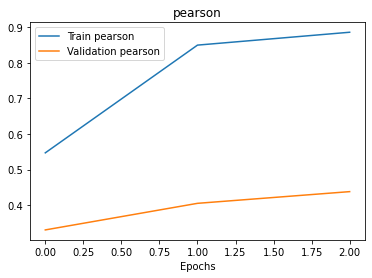

Best value for correlation on VAL set: 0.4382535517215729
Mean correlation on last five epochs on VAL set: 0.3915022611618042


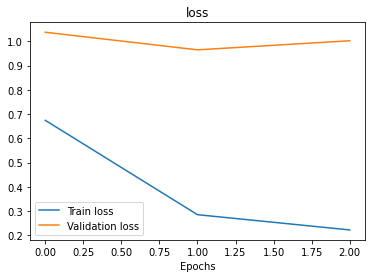

In [ ]:
plot_loss_history(h, 'pearson')
print("Best value for correlation on VAL set: " + str(np.max(h.history['val_pearson'])))
print("Mean correlation on last five epochs on VAL set: " + str(np.average(h.history['val_pearson'][-5:])))

plot_loss_history(h, 'loss')